# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r 
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: f:\YandexDisk\YandexDisk\Studies\Python\Jupyter\model-selection\train.csv

  0%|          | 0.00/664k [00:00<?, ?B/s]
 79%|███████▉  | 524k/664k [00:00<00:00, 3.95MB/s]
100%|██████████| 664k/664k [00:00<00:00, 4.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: f:\YandexDisk\YandexDisk\Studies\Python\Jupyter\model-selection\test.csv

  0%|          | 0.00/218k [00:00<?, ?B/s]
100%|██████████| 218k/218k [00:00<00:00, 4.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: f:\YandexDisk\YandexDisk\Studies\Python\Jupyter\model-selection\submission.csv

  0%|          | 0.00/14.7k [00:00<?, ?B/s]
100%|██████████| 14.7k/14.7k [00:00<?, ?B/s]


In [5]:
data = pd.read_csv('./train.csv')

<font color='yellow'>Комментарий: </font> Смотрю на случайные строчки

In [6]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3501,26,19.30,504.2,Male,1,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
2140,57,44.85,2572.95,Male,1,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
526,3,70.30,235.5,Female,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
655,19,89.65,1761.05,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,1
563,37,45.40,1593.1,Female,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Electronic check,0
495,59,79.20,4590.35,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Two year,Yes,Credit card (automatic),0
1657,5,83.60,404.2,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
2996,1,49.25,49.25,Male,1,Yes,Yes,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),1
4364,34,67.65,2339.3,Female,0,No,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
2276,72,20.35,1354.4,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,0


In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

<font color='yellow'>Комментарий: </font> Как мы видим, в датасете нет NaN значений

In [8]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

<font color='yellow'>Комментарий: </font> НОООО!!! Решая третье задание, я заметил, что все же что-то типа NaN у нас содержится - пустые строки в TotalSpent. Т.к. их очень мало относительно всей выборки, их можно удалить.

In [29]:
class TotalSpentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['TotalSpent'] = X['TotalSpent'].replace(r'^\s*$', '', regex=True) 
        X['TotalSpent'] = X['TotalSpent'].replace(r'\s+', '', regex=True)
        X['TotalSpent'] = pd.to_numeric(X['TotalSpent'], errors='coerce') #обязательно представляем строчки (пустые) в числа чтобы они стали NaN
        rows_to_drop = X[X.isna().any(axis=1)].index
        X.dropna(inplace=True)
        return X, rows_to_drop.tolist()

In [30]:
empty_values_handling_pipeline = Pipeline(
    [("total_spent_imputer", TotalSpentImputer())]
)

In [11]:
data = empty_values_handling_pipeline.fit_transform(data)

In [12]:
# #data['TotalSpent'] = data['TotalSpent'].astype('string').str.strip()
# data['TotalSpent'] = data['TotalSpent'].replace(r'^\s*$', '', regex=True) 
# data['TotalSpent'] = data['TotalSpent'].replace(r'\s+', '', regex=True)
# data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce') #обязательно представляем строчки (пустые) в числа чтобы они стали NaN
# data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

<font color='yellow'>Комментарий: </font> BoxPlot выбросов не нашел, значит их удалять не надо, ошибки в данных удалили ранее

1.

In [13]:
from matplotlib import style
style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

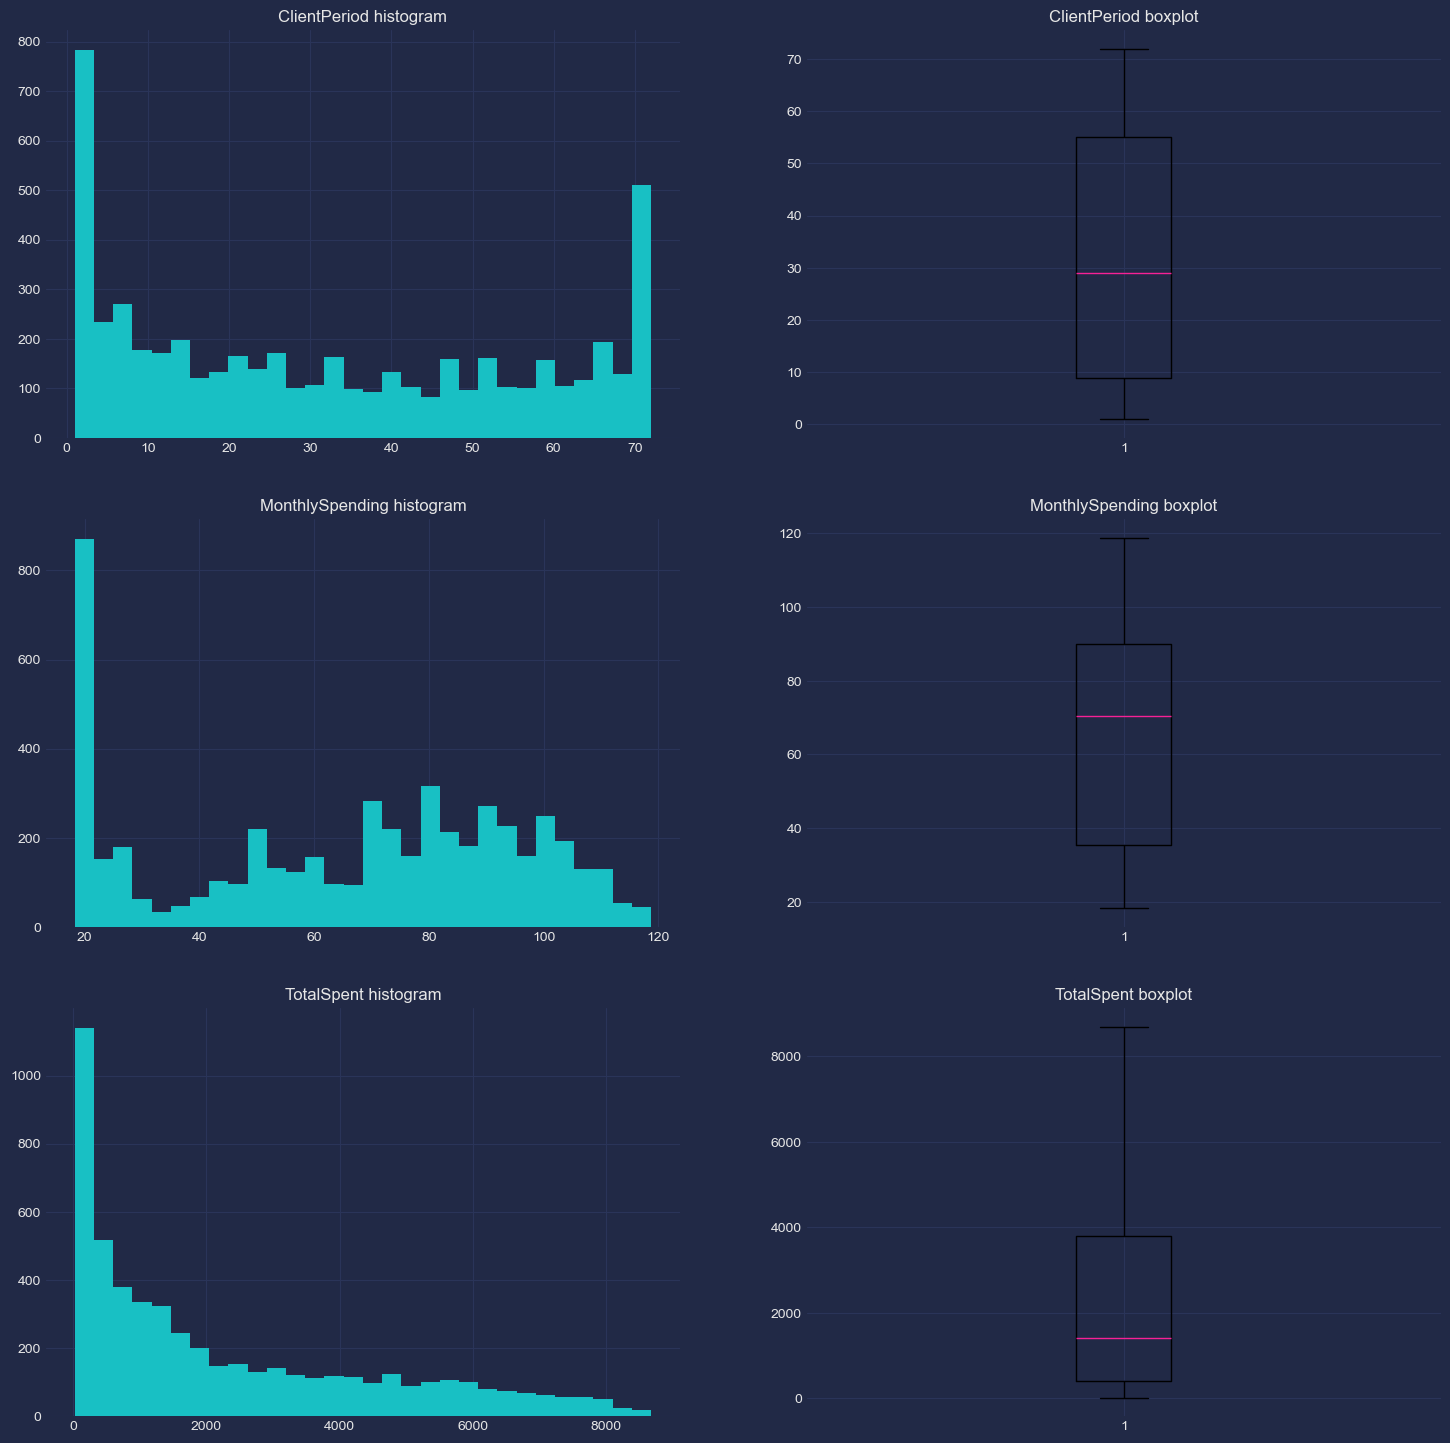

In [14]:
fig, ax = plt.subplots(len(num_cols),2,  figsize=(18,18))

for i, col in enumerate(num_cols):
    ax[i, 0].hist(data[col], bins=30)
    ax[i, 0].set_title(f'{col} histogram')
    ax[i, 1].boxplot(data[col])
    ax[i, 1].set_title(f'{col} boxplot')
    


In [15]:
data['HasMovieSubscription'].value_counts()

HasMovieSubscription
No                     2077
Yes                    2059
No internet service    1137
Name: count, dtype: int64

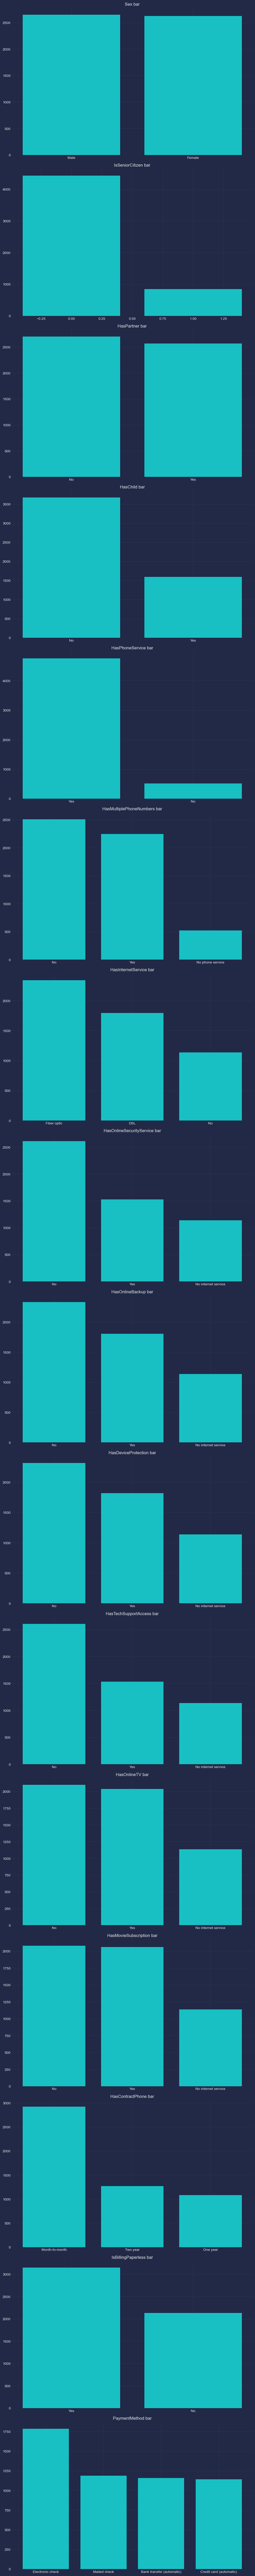

In [16]:
fig, ax = plt.subplots(len(cat_cols),  figsize=(10,100))

for i, col in enumerate(cat_cols):
    ax[i].bar(data[col].value_counts().index, data[col].value_counts().values)
    ax[i].set_title(f'{col} bar')

fig.tight_layout()
   

<font color='yellow'>Комментарий: </font> Как видно, выбросов в категориальных значениях также нет, так как значений не так много и их количество достаточно большое

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

<font color='yellow'>Комментарий: </font>Ошибки ликвидировали, выбросов нет

2. Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными. 

<BarContainer object of 2 artists>

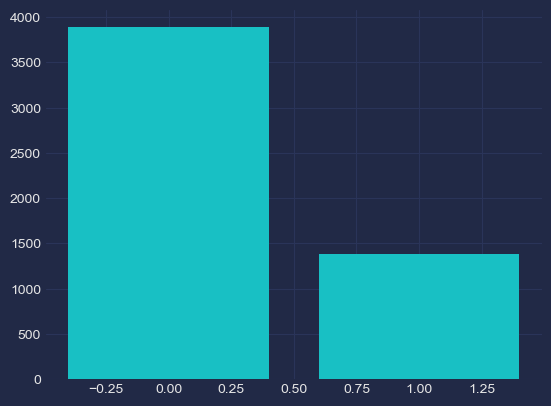

In [17]:
plt.bar(data['Churn'].value_counts().index, data[['Churn']].value_counts().values)

<font color='yellow'>Комментарий:</font> Классы являются несбалансированными, поэтому в качестве метрики будем использовать не accurecy, а roc_auc + stratify при разбиении на train и test, чтобы каждый класс попал пропорционально и в train и в test

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [19]:
class Preprocesser(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
   
        self.scaler = StandardScaler()
        self.scaler.fit(X[num_cols])

        self.encoder = OneHotEncoder()
        self.encoder.fit(X[cat_cols])

        return self

    def transform(self, X):
        X_scaled = self.scaler.transform(X[num_cols])
        X_scaled_df = pd.DataFrame(X_scaled, columns=self.scaler.get_feature_names_out(num_cols))
       
        one_hot_encoded = self.encoder.transform(X[cat_cols]).toarray()
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=self.encoder.get_feature_names_out(cat_cols))

        X = pd.concat([X_scaled_df, one_hot_df], axis=1)
        return X

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [20]:
y = data["Churn"]
X = data.drop(columns=["Churn"])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from catboost import CatBoostClassifier

In [24]:
model = CatBoostClassifier(silent=True, allow_writing_files=False)

param_grid = {
    "iterations": [100, 200],
    "depth": [4, 5, 6],
    "learning_rate": [0.01, 0.1],
    "l2_leaf_reg": [1, 3, 5],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=0,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train, cat_features=cat_cols)

print("Best parameters found: ", grid_search.best_params_)

y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC score: ", roc_auc)

Best parameters found:  {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
ROC AUC score:  0.8541432721130734


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [25]:
best_model = grid_search.best_estimator_

Лучшее решение отправьте в Stepik.

In [43]:
X_test = pd.read_csv("./test.csv")
full_proba = np.zeros(X_test.shape[0])
X_test, deleted_rows = empty_values_handling_pipeline.transform(X_test)
print(deleted_rows)

submission = pd.read_csv("./submission.csv")
print(best_model.predict_proba(X_test)[:, 1])
print(full_proba.shape)

full_proba[~submission.index.isin(deleted_rows)] = best_model.predict_proba(X_test)[:, 1]
submission["Churn"] = full_proba
submission.to_csv("./my_submission.csv", index=False)

[177, 767]
[0.04945467 0.68709802 0.6527764  ... 0.82628716 0.56114669 0.01732609]
(1761,)
